In [839]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca

In [840]:
# Amazon Raw Data
data_path = ("https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon.columns = ['Sentence', 'Sentiment']
#sms_raw.head(30)  
amazon.loc[amazon['Sentiment'] == 1].head()

,Sentence,Sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1


In [841]:
# Split the dataset in train and test 80% and have freedom to play with the ratio
msk = np.random.rand(len(amazon)) < 0.8
train, test = amazon[msk].copy(deep = True), amazon[~msk].copy(deep = True)

In [842]:
# Rows in the dataset and label
amazon['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

#### Feature Selection & Engineering

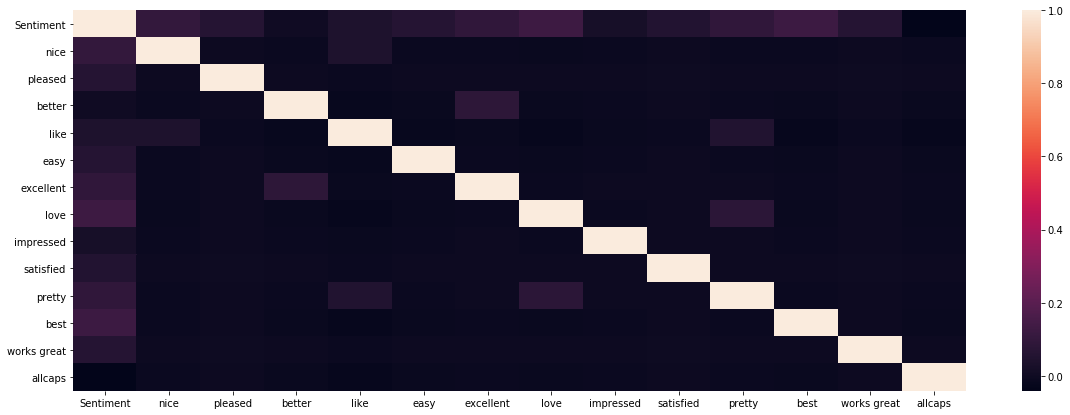

In [843]:
#Final iteration tried across different cuts. Accuracy >55%
keywords = [ 'nice', 'pleased', 'better',           
        'like', 'easy', 'excellent',
        'love','impressed',
        'satisfied','pretty',
        'best','works great']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

#Use the whole dataset
amazon['allcaps'] = amazon.Sentence.str.isupper()
amazon['Sentiment'] = (amazon['Sentiment'] == 1)
plt.figure(figsize=(20, 7))
sns.heatmap(amazon.corr())

In [844]:
# Define data & target for the model
data = amazon[keywords + ['allcaps']]
target = amazon['Sentiment']

In [845]:
# Initantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [846]:
# Display our results.
print("Number of mislabeled points (w/o training) out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

#Calculate Confusion Martrix
print(confusion_matrix(target, y_pred))

# from confusion matrix calculate accuracy
cm = confusion_matrix(target, y_pred)

#Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

#Specifity
Specifity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specifity : ', Specifity )

#Sensitivity
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', Sensitivity)

Number of mislabeled points (w/o training) out of a total 1000 points : 419
[[483  17]
 [402  98]]
Accuracy :  0.581
Specifity :  0.966
Sensitivity :  0.196


#### Principal Components Analysis

In [847]:
#Prepare data for PCA

X_std = StandardScaler().fit_transform(data)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [848]:
#Eigenvectores & Eigenvalues

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_vals)):
    eigvecs = eig_vecs[:, i].reshape(1, len(keywords)+1).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvecs))
    print('Eigenvalue {}: {}'.format(i + 1, eig_vals[i]))
    print(40 * '-')


sklearn_pca = PCA(n_components=len(keywords))
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

Eigenvector 1: 
[[-0.16903185]
 [ 0.02820896]
 [ 0.4675538 ]
 [-0.39103391]
 [ 0.05553096]
 [ 0.44636213]
 [-0.37235673]
 [ 0.04144077]
 [ 0.0242043 ]
 [-0.49762357]
 [ 0.06090112]
 [ 0.02820896]
 [ 0.06090112]]
Eigenvalue 1: 1.11950487180933
----------------------------------------
Eigenvector 2: 
[[ 0.02852984]
 [-0.13110957]
 [-0.21003601]
 [-0.50051667]
 [-0.22135775]
 [-0.02575073]
 [-0.52334066]
 [-0.1800085 ]
 [-0.11440129]
 [ 0.43726684]
 [-0.23445016]
 [-0.13110957]
 [-0.23445016]]
Eigenvalue 2: 0.8788535263741818
----------------------------------------
Eigenvector 3: 
[[-0.17033489]
 [-0.0707634 ]
 [-0.67224332]
 [ 0.10518307]
 [-0.11638656]
 [ 0.58279422]
 [ 0.12849956]
 [-0.09598577]
 [-0.06194084]
 [-0.29183866]
 [-0.12261676]
 [-0.0707634 ]
 [-0.12261676]]
Eigenvalue 3: 0.9143564281628002
----------------------------------------
Eigenvector 4: 
[[-0.33575259]
 [-0.18474307]
 [ 0.17467349]
 [ 0.09049208]
 [-0.29980498]
 [-0.45006743]
 [ 0.10569934]
 [-0.24902473]
 [-0.161

#### Recursive Feature Elimination

In [849]:
# create the RFE model and select attributes

rfe = RFE(bnb, len(keywords))
fit = rfe.fit(data,target)

# summarize the selection of the attributes

result_RFE = pd.DataFrame(list(zip(data.head(0), rfe.ranking_, rfe.support_)),columns=['Features','Ranking','Support'] )
result_RFE.sort_values('Ranking')

,Features,Ranking,Support
0,nice,1,True
1,pleased,1,True
2,better,1,True
4,easy,1,True
5,excellent,1,True
6,love,1,True
7,impressed,1,True
8,satisfied,1,True
9,pretty,1,True
10,best,1,True


In [850]:
#Result as a list for "keywords"
result= result_RFE[result_RFE.Support]
my_list = result["Features"].tolist()
my_list

['nice',
 'pleased',
 'better',
 'easy',
 'excellent',
 'love',
 'impressed',
 'satisfied',
 'pretty',
 'best',
 'works great',
 'allcaps']

##### Splitting the data in a train and a test subset

**Training the clasifier with 80% of the data**

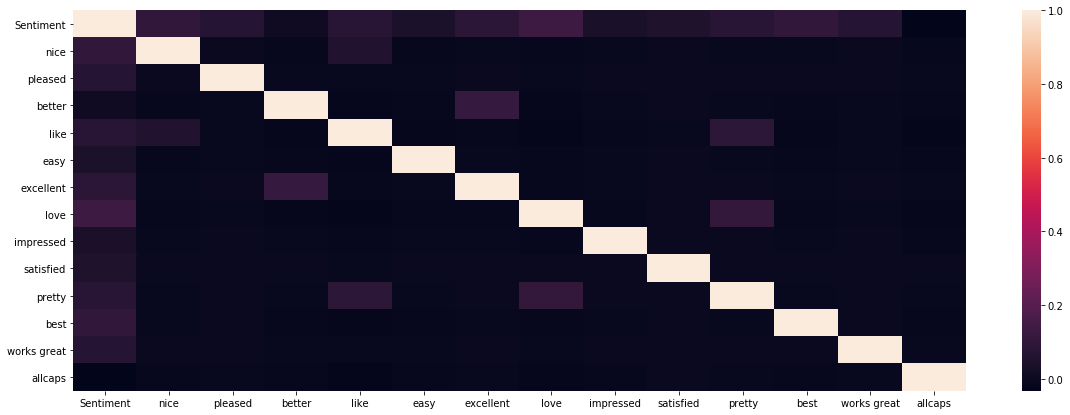

In [851]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    train[str(key)] = train.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )
    
#Using the train subset
train['allcaps'] = train.Sentence.str.isupper()
train['Sentiment'] = (train['Sentiment'] == 1)

#Plot correlation matrix
plt.figure(figsize=(20, 7))
sns.heatmap(train.corr())

In [852]:
# Define training data & target for the model
data1 = train[keywords + ['allcaps']]
target1 = train['Sentiment']

In [853]:
# Initantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred1 = bnb2.predict(data1)

# Display our results.
print("Number of mislabeled points in TRAIN out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))

confusion_matrix(target1, y_pred1)

Number of mislabeled points in TRAIN out of a total 797 points : 338


array([[381,  10],
       [328,  78]], dtype=int64)

In [854]:
# Display our results.
print("Number of mislabeled points in TRAIN out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))

confusion_matrix(target1, y_pred1)

# from confusion matrix calculate accuracy
cm1 = confusion_matrix(target1, y_pred1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Specifity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specifity : ', Specifity1 )

Sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', Sensitivity1)

Accuracy :  0.57590966123
Specifity :  0.97442455243
Sensitivity :  0.192118226601


**Test the result of training the model**

In [855]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    test[str(key)] = test.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )
test['allcaps'] = test.Sentence.str.isupper()
test['Sentiment'] = (test['Sentiment'] == 1)

In [856]:
#Define the data & target with test subset
data2 = test[keywords +['allcaps']]
target2 = test['Sentiment']

In [857]:
# Initantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data2)

Number of mislabeled points in TEST out of a total 203 points : 77


array([[109,   0],
       [ 77,  17]], dtype=int64)

In [858]:
# Display our results.
print("Number of mislabeled points in TEST out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

confusion_matrix(target2, y_pred2)

# from confusion matrix calculate accuracy
cm2 = confusion_matrix(target2, y_pred2)

total2=sum(sum(cm2))
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

Specifity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specifity : ', Specifity2 )

Sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', Sensitivity2)

Accuracy :  0.620689655172
Specifity :  1.0
Sensitivity :  0.18085106383


### Cross validation & feature selection

In [859]:
#Test through cross validation the result of the best model using the the hould out subsets

keywords2 = keywords
   
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    train[str(key)] = train.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

#Define data andtarget for cross validation
amazon['allcaps'] = amazon.Sentence.str.isupper()
amazon['Sentiment'] = (amazon['Sentiment'] == 1)
datacv = amazon[keywords2]
targetcv = amazon['Sentiment']

In [860]:
# Initantiate our model and store it in a new variable.
bnbcv = BernoulliNB()

# Fit our model to the data.
bnbcv.fit(datacv, targetcv)

# Classify, storing the result in a new variable.
y_predcv = bnbcv.predict(datacv)

Number of mislabeled points out of a total 1000 points : 419


array([[483,  17],
       [402,  98]], dtype=int64)

In [861]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    datacv.shape[0],
    (targetcv != y_predcv).sum()
))

#Show Confusion Matrix
confusion_matrix(targetcv, y_predcv)

#Cross validation, scores
skf = StratifiedKFold(n_splits=10, random_state=0)
scores = cross_val_score(bnb, datacv, targetcv, cv=skf)

#Test the prediction capacity of the model
predicted = cross_val_predict(bnb, datacv, y_predcv, cv=skf)
prediction = metrics.accuracy_score(targetcv, predicted)

#Print scores, accuracy of the model and prediction
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Prediction: %0.2f " % (prediction))

[ 0.59  0.6   0.56  0.57  0.58  0.53  0.59  0.59  0.57  0.59]
Accuracy: 0.58 (+/- 0.04)
Prediction: 0.58 


To explain 60% of the variance we would need 22 features 

#### Results of the iterations to improve the classifier´s performance

##### First Classifier (w/o Training)

**keywords**

            'wanted','important','sturdiness','encourage',
            'happier','comfort','excited', 'flawlessly',
            'pleased','outperform','stars''adorable', 'more',
            'crisp','increase','better','thumbs','price','very', 'significantly',
            'strong','perfectly','surprised','amazed','sturdy', 'securely','right',
            'joy','finally','satisfied','better', 'pretty','easy','10','easier','fulfills','ideal',
            'beautiful','best','works','comfortable' ,'comfortably','charm','incredible', 'extra',
            'quality','incredibly' ,'super','well','nice', 'clear','finished','well','more', 'ideal',
            'recommend','good','happy','like', 'excellent', 'awesome','cool', 'fantastic','ok','love',
            'reasonable','fine','great','impressed'

##### Second iteration

**keywords**

            'happier', 'nice','adorable',
            'excited', 'pleased','recommend',
            'crisp','increase','better','significantly',
            'incredibly' ,'super','well', 'clear','securely',
            'ideal', 'happy','like', 'easy','amazed',
            'excellent', 'awesome','cool', 'fantastic','sturdy',
            'love', 'reasonable','fine','great','impressed',
             'perfectly','surprised','right',
            'joy','satisfied','better','pretty','very good',
            'easier','fulfills','ideal', 'beautiful','best','comfortable' ,
            'incredible', 'extra', 'works','comfortably'

##### Third iteration

**keywords**

            'nice', 'pleased',
            'better','like', 'easy',
            'excellent', 'awesome','cool',
            'love','great','impressed',
            'satisfied','better','pretty','very good',
            'best','extra', 'works'


##### Fourth iteration

**keywords**

            'nice','pleased', 'better','like', 'easy',
            'excellent','cool',
            'love','great','impressed',
            'satisfied','better','pretty',
            'best','extra','works'

##### Fifth iteration

**keywords**

            'nice', 'pleased', 'better',           
            'like', 'easy', 'excellent',
            'love','impressed',
            'satisfied','pretty',
            'best','works great'

**Do any of your classifiers seem to overfit?**

The classifiers that were done with the 80/20 approach seem to overfit. It seems that 58% of accuracy for this model is significant with the amount of data in the dataset and can be explained with 11 features. The first model had 66 features achieving an accuracy of 62%.

The reduction of features was done, first without reducing the accuracy and later reducing the accuracy.

**Which seem to perform the best? Why?**

The classifier that seems to be performing best is the last one becuase it is not overfitted due to the number of features used and the accuracy is higher than in other classifiers that have been tried before, having less false positives and false negatives